In [166]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# To display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [167]:
dataset=pd.read_csv('houses_to_rent.csv')

# To print the shape of the dataset with rows and columns
print(dataset.shape)

(10692, 13)


In [168]:
# To print the top5 records
dataset.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [170]:
# To find the unique values in each column
unique_val = dataset.nunique()
unique_val = unique_val.sort_values()
unique_val

animal                    2
furniture                 2
city                      5
bathroom                 10
rooms                    11
parking spaces           11
floor                    35
fire insurance (R$)     216
area                    517
rent amount (R$)       1195
property tax (R$)      1243
hoa (R$)               1679
total (R$)             5751
dtype: int64

In [174]:
# To check the type of each feature
dataset.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                  object
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

Missing Values

In [175]:
# To display the number of missing values in each feature
dataset.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [177]:
dataset.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


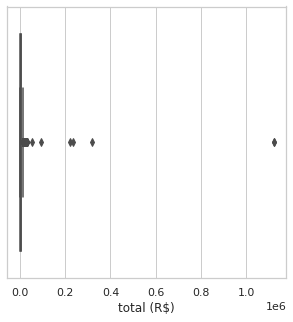

In [124]:
# To check if any outliers
plt.figure(figsize = (5,5))
sns.boxplot(dataset["total (R$)"])

In [145]:
# Since there are many outliers let us remove them
q1 = dataset["total (R$)"].quantile(0.25)
q3 = dataset["total (R$)"].quantile(0.75)

IQR = q3 - q1
IF = q1 - (1.5 * IQR)
OF = q3 + (1.5 * IQR)

In [146]:
data = dataset[~((dataset["total (R$)"] < IF) | (dataset["total (R$)"] > OF))]
data.shape

(9986, 13)

In [127]:
print("Before the Removal of Outliers")
print("No. of rows : ", dataset.shape[0])
print("No. of columns : ", dataset.shape[1])
print("=======================")
print("After the Removal of Outliers")
print("No. of rows : ", data.shape[0])
print("No. of columns : ", data.shape[1])

Before the Removal of Outliers
No. of rows :  10692
No. of columns :  13
After the Removal of Outliers
No. of rows :  9986
No. of columns :  13


Text(0, 0.5, 'Total House Rent')

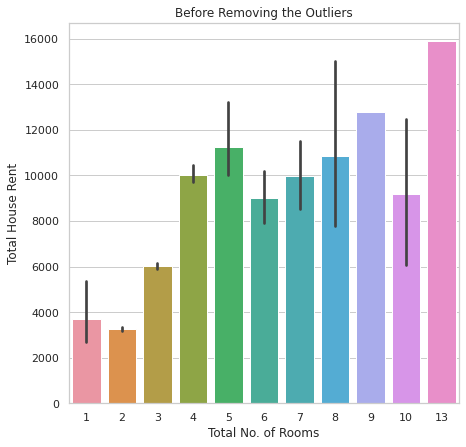

In [128]:
# Let us see how outliers influence the data
# Before the Removal of Outliers
plt.figure(figsize = (7,7))
sns.set(style = "whitegrid")
f = sns.barplot(x = "rooms", y = "total (R$)", data = dataset)
f.set_title("Before Removing the Outliers")
f.set_xlabel("Total No. of Rooms")
f.set_ylabel("Total House Rent")

Text(0, 0.5, 'Total House Rent')

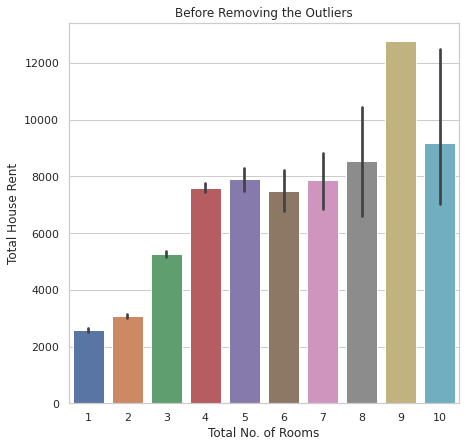

In [129]:
# After the Removal of Outliers
plt.figure(figsize = (7,7))
sns.set(style = "whitegrid")
f = sns.barplot(x = "rooms", y = "total (R$)", data = data)
f.set_title("Before Removing the Outliers")
f.set_xlabel("Total No. of Rooms")
f.set_ylabel("Total House Rent")

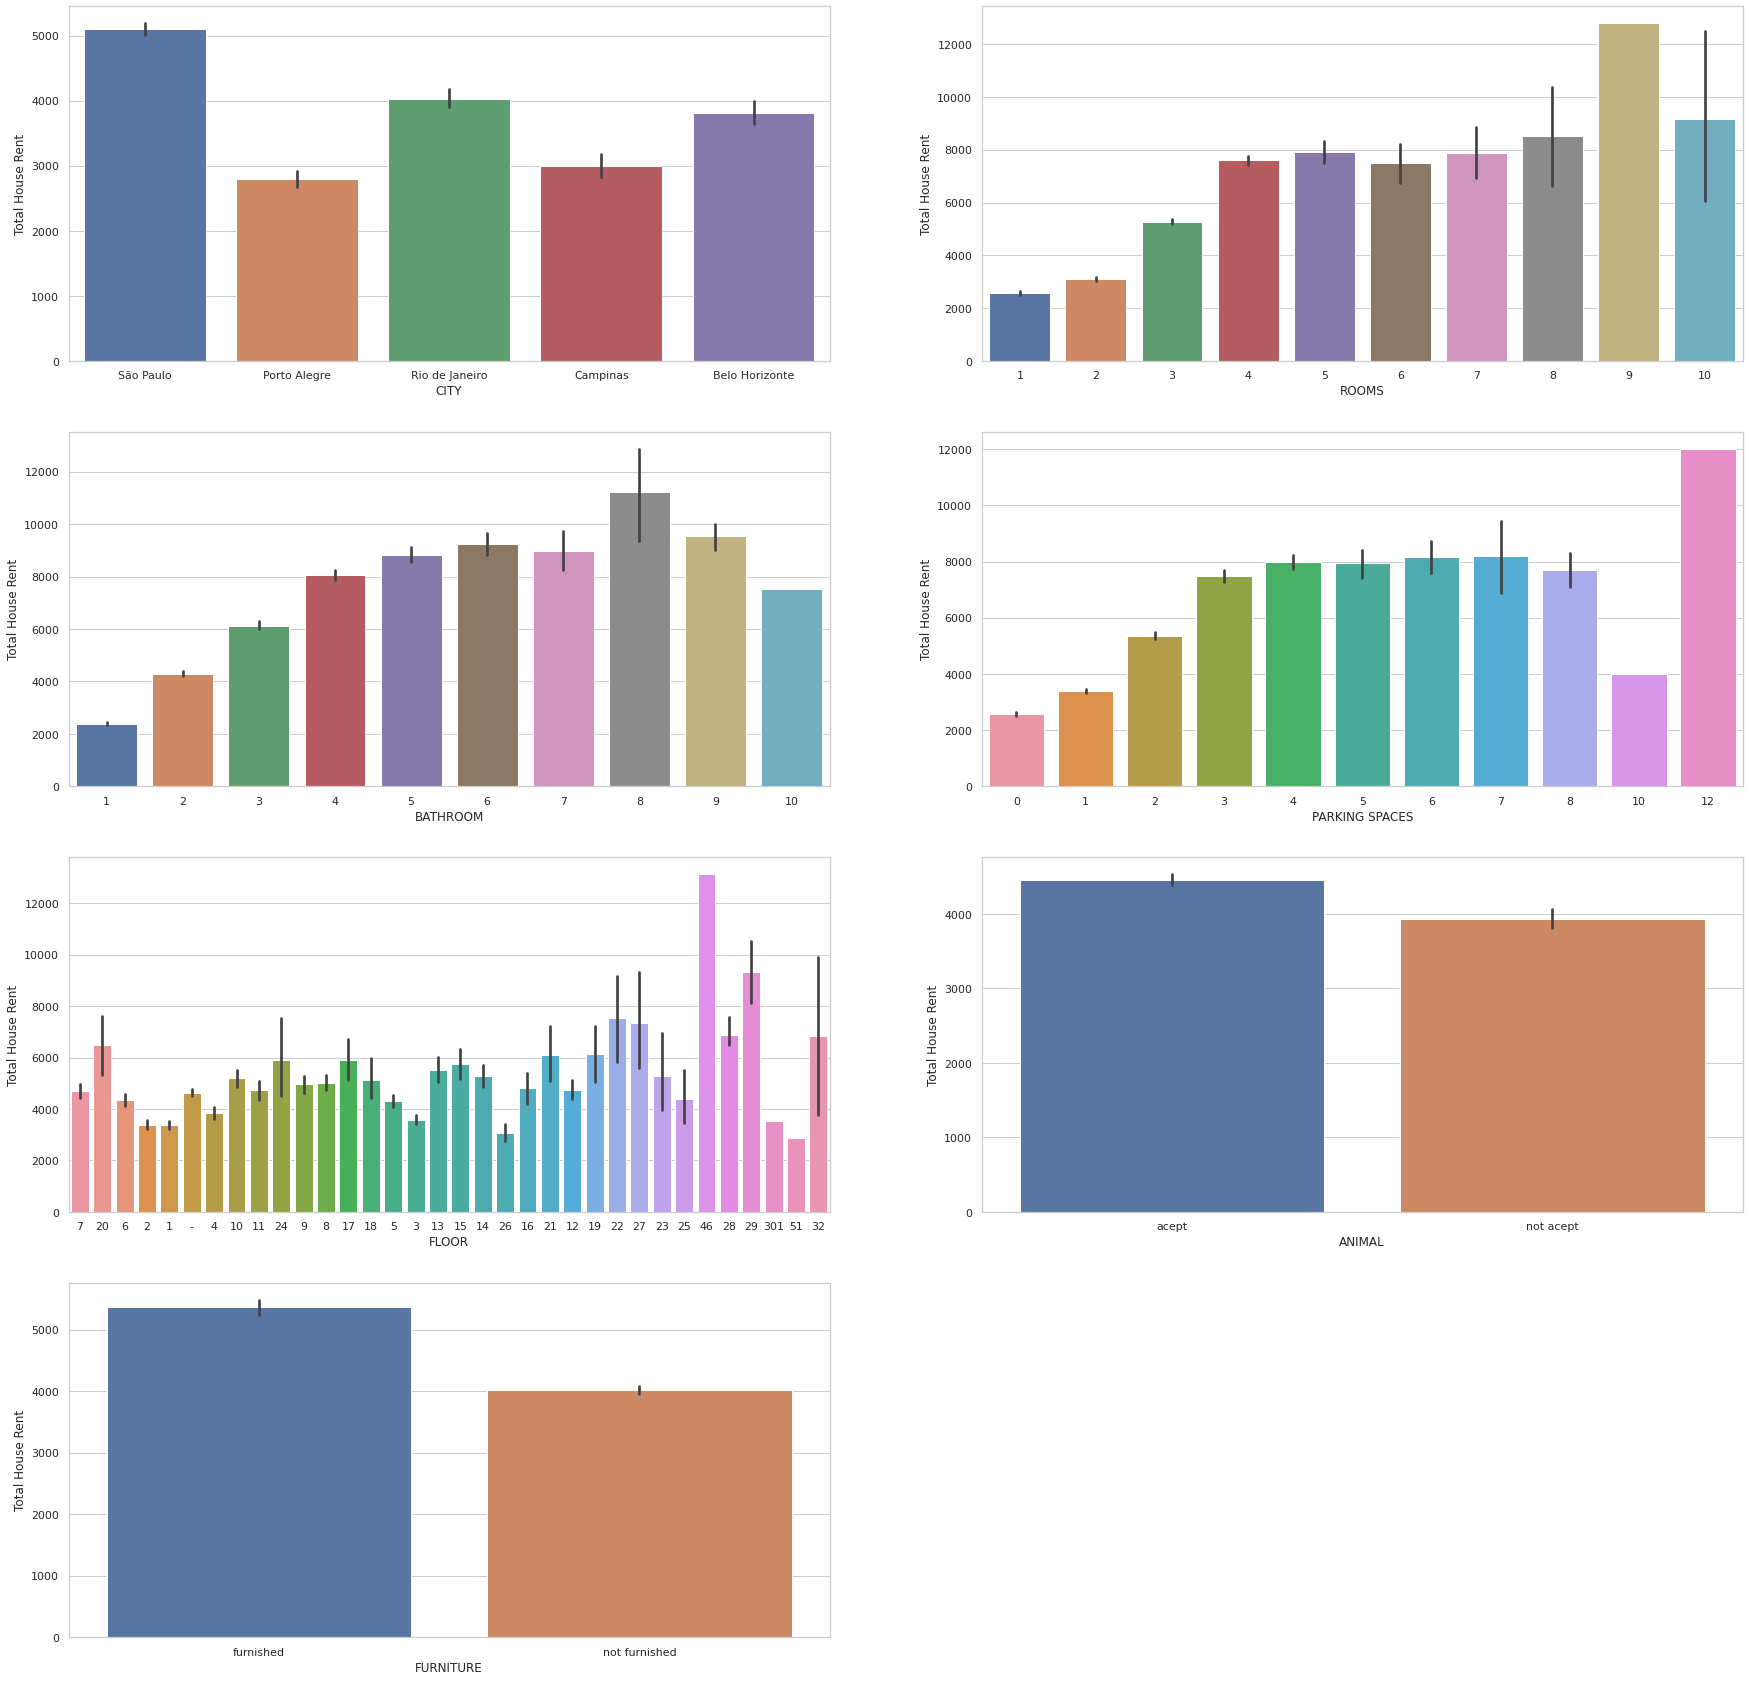

In [130]:
# Let us visualize more on the dataset
columns = ["city","rooms","bathroom","parking spaces","floor","animal","furniture"]
plt.figure(figsize = (30,30))
for i,var in enumerate(columns,1):
    plt.subplot(4,2,i)
    f = sns.barplot(x = data[var], y = data["total (R$)"])
    f.set_xlabel(var.upper())
    f.set_ylabel("Total House Rent")

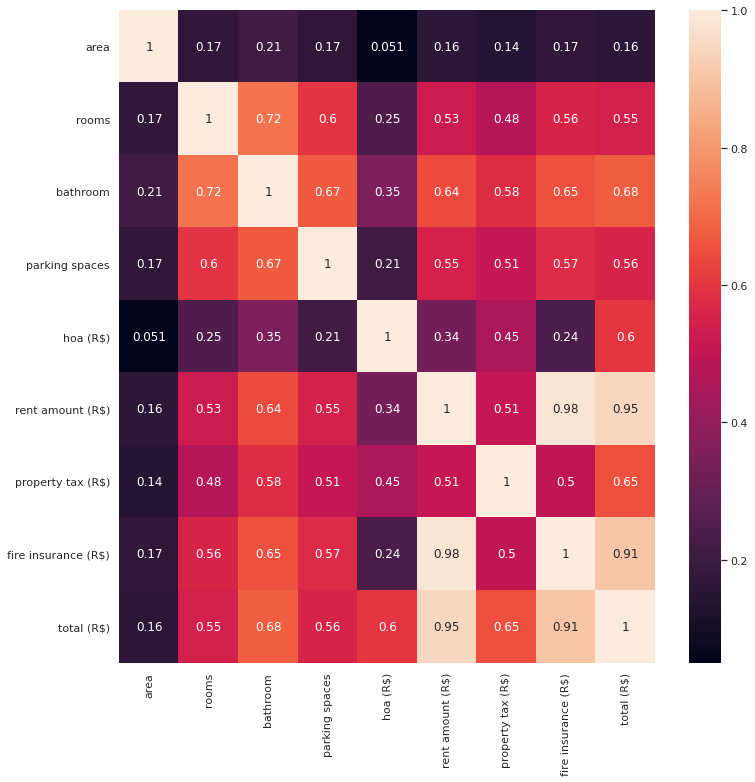

In [131]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


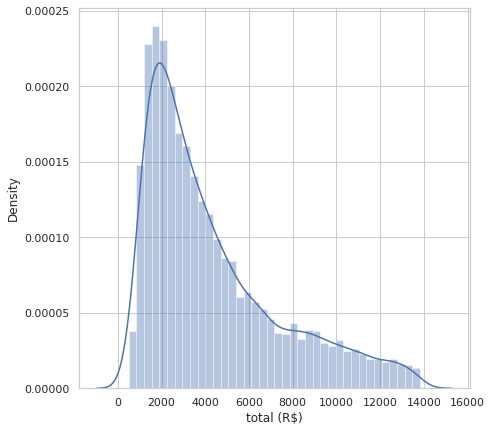

In [132]:
# To check the normality of the target variable
plt.figure(figsize = (7,7))
sns.set(style = "whitegrid")
f = sns.distplot(data["total (R$)"])

Data Encoding

In [164]:
dataset['floor'].replace('-', 0)

0         7
1        20
2         6
3         2
4         1
         ..
10687     5
10688    17
10689     8
10690     8
10691     0
Name: floor, Length: 10692, dtype: object

In [165]:
dataset['floor'] = pd.to_numeric(dataset['floor'])

ValueError: ignored

In [161]:
dataset.fillna(value=dataset['floor'].mean(), inplace=True)

TypeError: ignored

In [147]:
data["animal"].value_counts()

acept        7741
not acept    2245
Name: animal, dtype: int64

In [148]:
animal_dict = {"acept": 1,"not acept":0}
data["animal_Encoded"] = data["animal"].map(animal_dict)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [149]:
data["furniture"].value_counts()

not furnished    7624
furnished        2362
Name: furniture, dtype: int64

In [150]:
furniture_dict = {"furnished":1, "not furnished":0}
data["furniture_Encoded"] = data["furniture"].map(furniture_dict)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [151]:
data['city']= data['city'].astype('category')
data['city'] = data['city'].cat.codes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [152]:
data = data.drop(["animal","furniture"], axis = 1)
data.head()

,city,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),animal_Encoded,furniture_Encoded
0,4,70,2,1,1,7,2065,3300,211,42,5618,1,1
1,4,320,4,4,0,20,1200,4960,1750,63,7973,1,0
2,2,80,1,1,1,6,1000,2800,0,41,3841,1,0
3,2,51,2,1,0,2,270,1112,22,17,1421,1,0
4,4,25,1,1,0,1,0,800,25,11,836,0,0


In [156]:
data.dtypes

city                     int8
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                  object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
animal_Encoded          int64
furniture_Encoded       int64
dtype: object

In [153]:
# Let us separate dependant and independant variables 
x = data.drop("total (R$)", axis = 1)
y = data["total (R$)"]

In [154]:
# Let us perform Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [155]:
# Let us Standardize the data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(x_train)
std_data = std.transform(x_train)

ValueError: ignored

In [173]:
dataset['floor'].replace('-', np.NaN)

0          7
1         20
2          6
3          2
4          1
        ... 
10687      5
10688     17
10689      8
10690      8
10691    NaN
Name: floor, Length: 10692, dtype: object